# Objective

- Leveraging the sample data build a statistical model to predict what influences the insurance charges.

# Library & Data Import

In [2]:
# Improting packages and libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [3]:
# reading & previewing data
df = pd.read_csv('/content/drive/MyDrive/Regression Modelling/Linear Regression/Insurance Project/insurance.csv', header=0) # header 0 means telling dataset has header and it is in the first (0th) line
df.head()

,age,sex,bmi,children,smoker,region,charges_thousand
0,19,female,27.900,0,yes,southwest,16.884924
1,18,male,33.770,1,no,southeast,1.725552
2,28,male,33.000,3,no,southeast,4.449462
3,33,male,22.705,0,no,northwest,21.984471
4,32,male,28.880,0,no,northwest,3.866855


In [4]:
# finding count of values in each variable and their data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   object 
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   object 
 5   region            1338 non-null   object 
 6   charges_thousand  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Correlation Analysis
- This is to understand the relationship between the independent and dependent variables

In [5]:
# creating correlation plot
df.corr()

,age,bmi,children,charges_thousand
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges_thousand,0.299008,0.198341,0.067998,1.000000


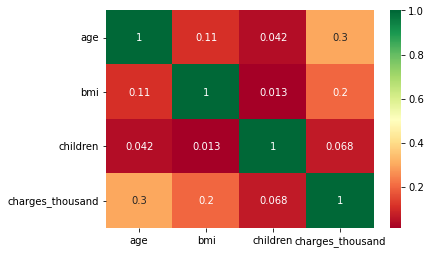

In [6]:
# plotting the correlation amongst independent and dependent variables in graph
sns.heatmap(df.corr(),cmap='RdYlGn',annot=True)

## Dummy Variable Creation
- This is done to convert categorical values into numerical/boolean values for model building.

## Note: Avoid the Dummy Variable Trap
- Always remember to avoid the dummy variable trap. The way to do that is N-1.
- While creating dummy variables off of the categorical variable, always reduce the number of values by 1.

In [7]:
# creating dummy variables for all the categorical variables in the dataset
df = pd.get_dummies(df)

In [8]:
# testing the operations
df.head()

,age,bmi,children,charges_thousand,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16.884924,1,0,0,1,0,0,0,1
1,18,33.770,1,1.725552,0,1,1,0,0,0,1,0
2,28,33.000,3,4.449462,0,1,1,0,0,0,1,0
3,33,22.705,0,21.984471,0,1,1,0,0,1,0,0
4,32,28.880,0,3.866855,0,1,1,0,0,1,0,0


In [9]:
# deleting the unnecessary dummy variables
del df['sex_male']
del df['smoker_no']
del df['region_southwest']

In [10]:
# testing the operations
df.head()

,age,bmi,children,charges_thousand,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast
0,19,27.900,0,16.884924,1,1,0,0,0
1,18,33.770,1,1.725552,0,0,0,0,1
2,28,33.000,3,4.449462,0,0,0,0,1
3,33,22.705,0,21.984471,0,0,0,1,0
4,32,28.880,0,3.866855,0,0,0,1,0


# Linear Regression

Using Statsmodel Library

In [11]:
# listing the columns
df.columns

Index(['age', 'bmi', 'children', 'charges_thousand', 'sex_female',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast'],
      dtype='object')

 ### Declaring the dependent and the independent variables

In [12]:
x = df[['age', 'bmi', 'children', 'sex_female',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast']]
y = df['charges_thousand']

In [13]:
# Creating Model Onject and Fitting Data
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:       charges_thousand   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:06:13   Log-Likelihood:                -4305.2
No. Observations:                1338   AIC:                             8628.
Df Residuals:                    1329   BIC:                             8675.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -13.0299      1.033  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Observation:

Variables sex_female, and regions do not have statistically significant influence upon Profit.

# Backward Elimination for Feature Selection

1. **Define Confidence Interval**
95% Confidence Interval or 0.05 Significance Level

2. **Review the Model Output**
Identify and Remove the Predictor with P Value > Significance Level and re-run model to review the revised outcome.

3. **Model with Optimal Predictors**
Keep repeating the step 2, unless the model does NOT have any predictor with P Value > Significance Level

[Step by Step process](https://drive.google.com/file/d/1AMS7yx7RSEneANegguprnrJJH74oVkwk/view?usp=sharing)

[Read more here](https://towardsdatascience.com/backward-elimination-for-feature-selection-in-machine-learning-c6a3a8f8cef4)

 ### Removing aforemrntioned independent variables

In [14]:
x = df[['age', 'bmi', 'children',
       'smoker_yes']]
y = df['charges_thousand']

In [15]:
# Creating Model Onject and Fitting Data
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:       charges_thousand   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:10:58   Log-Likelihood:                -4308.4
No. Observations:                1338   AIC:                             8627.
Df Residuals:                    1333   BIC:                             8653.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.1028      0.942    -12.848      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Observation:

Variables smoker_yes have highest magnitude statistically significant influence upon Profit. Therefore testing simple linear regression on that.

In [17]:
x = df[['smoker_yes']]
y = df['charges_thousand']

In [18]:
# Creating Model Onject and Fitting Data
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:       charges_thousand   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     2178.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):          8.27e-283
Time:                        18:15:42   Log-Likelihood:                -4588.2
No. Observations:                1338   AIC:                             9180.
Df Residuals:                    1336   BIC:                             9191.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4343      0.229     36.829      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Observation:

Variables smoker_yes alone explain lesser variation within the dependent variable.

# Conclusion

Basis the goodness of fit of the model and the statistical significance we come to the conclusion that independent variables 'age', 'bmi', 'children',
'smoker_yes' in conjunction explains the variations of the dataset in the most respectable fashion.

Therefore, we can state that with over 95% Confidence Interval, with all other independent variables intact

- An increase in the age by 1 unit, shall increase charges_thousand by 0.25 unit.
- An increase in the bmi by 1 unit, shall increase charges_thousand by 0.32 unit.
- An increase in the no of children by 1 unit, shall increase charges_thousand by 0.47 unit.
- An increase in the smoker_yes by 1 unit, shall increase charges_thousand by 23.81 unit.